# Análise exploratória

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno
%matplotlib inline

# Set visualization style and figure size
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

In [13]:
# Load the datasets
initial_clean_df = pd.read_csv('initial_clean.csv')
print(f"Dataset shape: {initial_clean_df.shape}")
# Display the first few rows
print("\nFirst 5 rows:")
display(initial_clean_df.head())

Dataset shape: (110397, 63)

First 5 rows:


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,winner_lucky_loser,loser_lucky_loser,winner_special_exempt,loser_special_exempt,winner_alternate,loser_alternate,winner_wildcard,loser_wildcard,winner_protected_ranking,loser_protected_ranking
0,1990-339,Adelaide,Hard,32,A,19900101,1,101843,Sergi Bruguera,R,...,False,False,False,False,False,False,False,False,False,False
1,1990-339,Adelaide,Hard,32,A,19900101,2,100714,Broderick Dyke,L,...,False,False,False,False,False,False,True,False,False,False
2,1990-339,Adelaide,Hard,32,A,19900101,3,101529,Michael Stich,R,...,False,False,False,False,False,False,False,False,False,False
3,1990-339,Adelaide,Hard,32,A,19900101,4,100628,Michiel Schapers,R,...,False,False,False,False,False,False,False,False,False,False
4,1990-339,Adelaide,Hard,32,A,19900101,5,101404,Thomas Muster,L,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Display basic information about the dataset
print("Dataset Info:")
initial_clean_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110397 entries, 0 to 110396
Data columns (total 63 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   tourney_id                110397 non-null  object 
 1   tourney_name              110397 non-null  object 
 2   surface                   110344 non-null  object 
 3   draw_size                 110397 non-null  int64  
 4   tourney_level             110397 non-null  object 
 5   tourney_date              110397 non-null  int64  
 6   match_num                 110397 non-null  int64  
 7   winner_id                 110397 non-null  int64  
 8   winner_name               110397 non-null  object 
 9   winner_hand               110390 non-null  object 
 10  winner_ht                 107561 non-null  float64
 11  winner_ioc                110397 non-null  object 
 12  winner_age                110386 non-null  float64
 13  loser_id                  1103

Columns with missing values:


,Missing Values,Percentage
minutes,16719,15.144433
w_bpSaved,13955,12.640742
l_1stIn,13955,12.640742
l_df,13955,12.640742
l_ace,13955,12.640742
w_bpFaced,13955,12.640742
l_1stWon,13955,12.640742
w_2ndWon,13955,12.640742
w_1stWon,13955,12.640742
w_1stIn,13955,12.640742


<Figure size 1400x800 with 0 Axes>

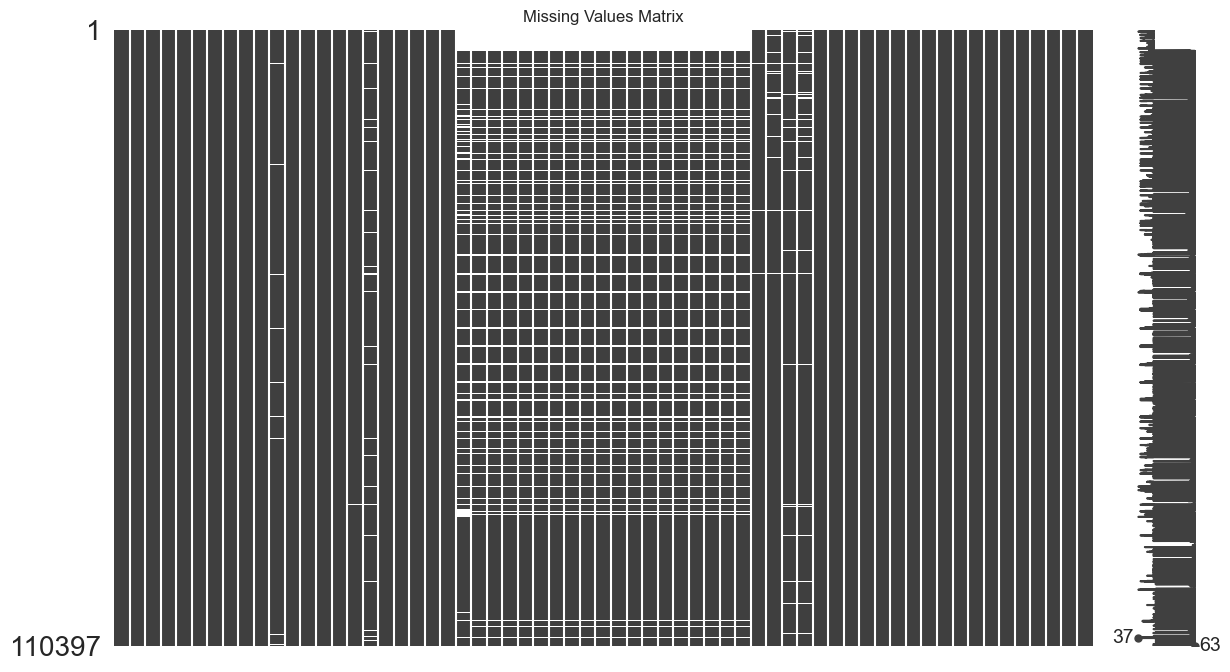

<Figure size 1400x800 with 0 Axes>

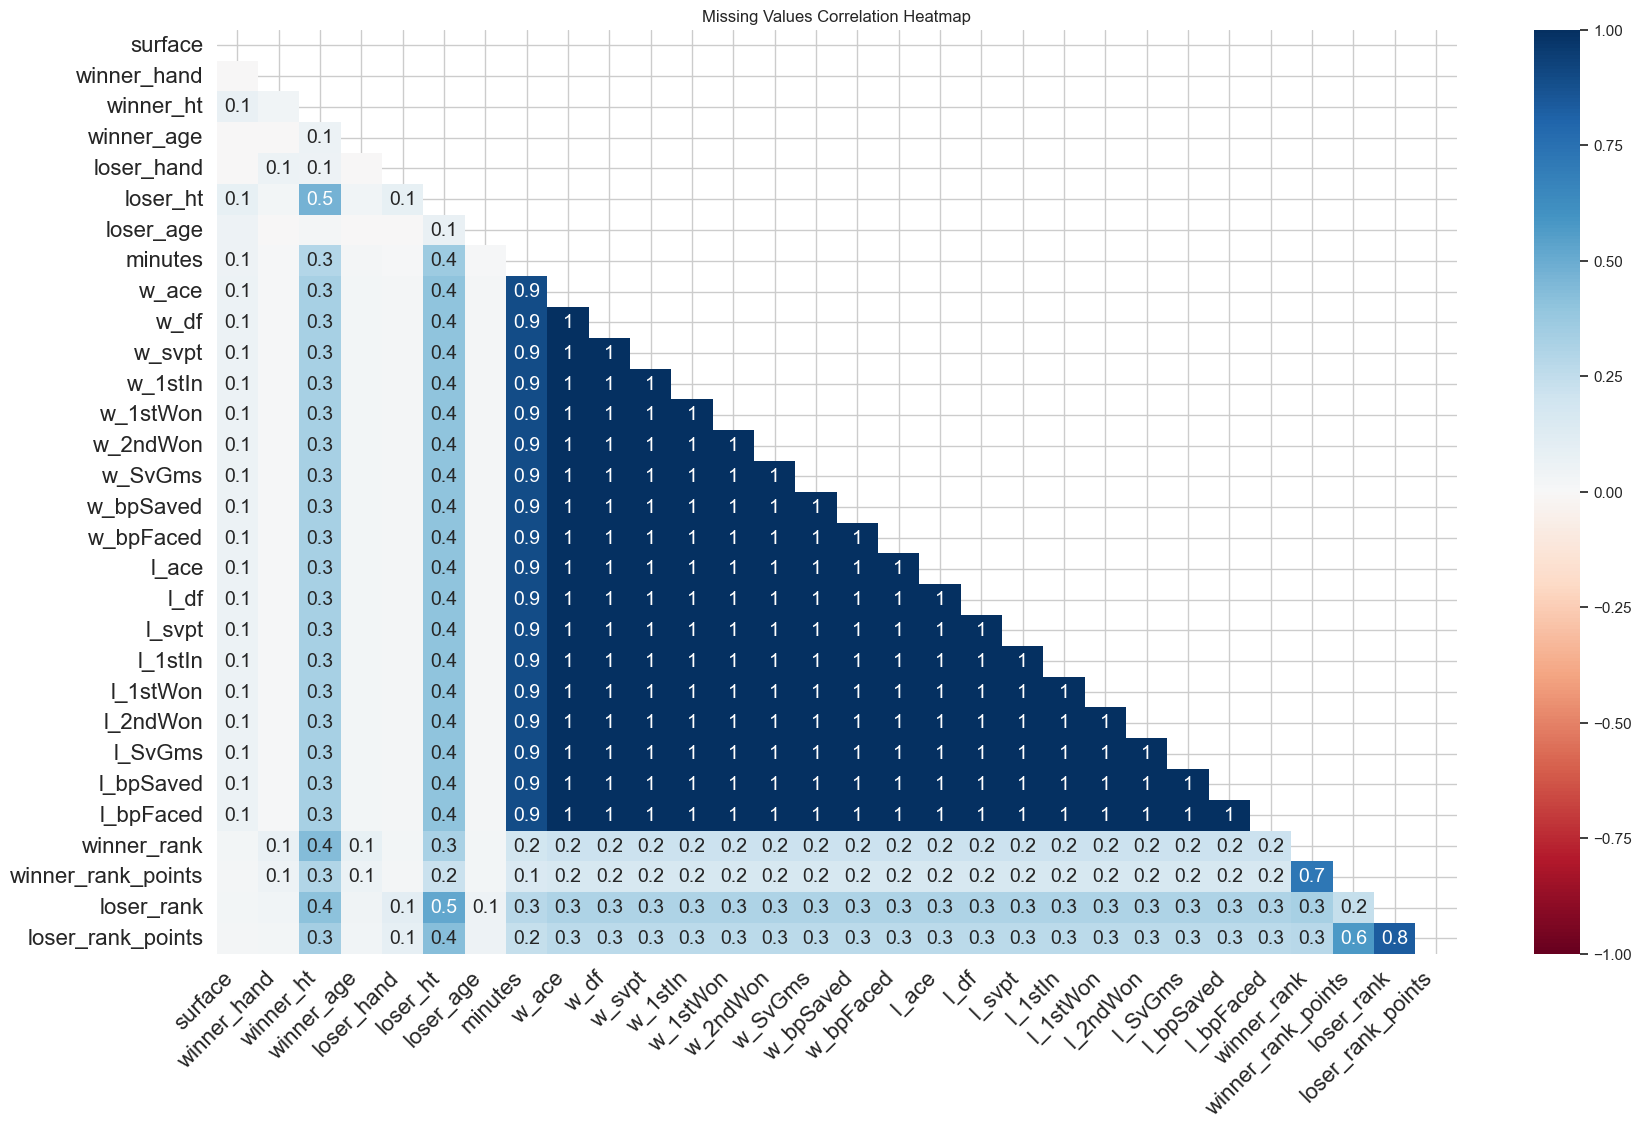

In [15]:
# Checking for missing values
missing_values = initial_clean_df.isnull().sum()
missing_percent = (missing_values / len(initial_clean_df)) * 100

# Display columns with missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
print("Columns with missing values:")
display(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# Visualize missing values
plt.figure(figsize=(14, 8))
msno.matrix(initial_clean_df, figsize=(14, 8))
plt.title('Missing Values Matrix')
plt.show()

# Missing values heatmap
plt.figure(figsize=(14, 8))
msno.heatmap(initial_clean_df)
plt.title('Missing Values Correlation Heatmap')
plt.show()

In [16]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics:")
display(initial_clean_df.describe().T)

# Check unique values for categorical columns (selecting a few important ones)
categorical_cols = ['surface', 'tourney_level', 'winner_hand', 'loser_hand', 'winner_ioc', 'loser_ioc']
for col in categorical_cols:
    if col in initial_clean_df.columns:
        print(f"\nUnique values in {col}:")
        display(initial_clean_df[col].value_counts())

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
draw_size,110397.0,5.352477e+01,38.723314,2.0,32.0,32.0,64.0,128.0
tourney_date,110397.0,2.005618e+07,99375.462931,19900101.0,19970404.0,20050606.0,20140504.0,20240520.0
match_num,110397.0,7.389378e+01,113.389573,1.0,10.0,24.0,78.0,1701.0
winner_id,110397.0,1.073909e+05,17746.704242,100284.0,102021.0,103566.0,104871.0,212721.0
winner_ht,107561.0,1.856853e+02,6.652413,160.0,180.0,185.0,190.0,211.0
winner_age,110386.0,2.572476e+01,3.813878,14.3,22.9,25.4,28.2,43.6
loser_id,110397.0,1.074795e+05,17834.314072,100224.0,102035.0,103507.0,104926.0,212722.0
loser_ht,105000.0,1.851838e+02,6.604559,160.0,180.0,185.0,190.0,211.0
loser_age,110364.0,2.584314e+01,3.936048,14.5,23.0,25.6,28.4,46.0
best_of,110397.0,3.434613e+00,0.824830,3.0,3.0,3.0,3.0,5.0



Unique values in surface:


surface
Hard      55065
Clay      36856
Grass     10518
Carpet     7905
Name: count, dtype: int64


Unique values in tourney_level:


tourney_level
A    63533
M    19016
G    17272
D    10019
F      557
Name: count, dtype: int64


Unique values in winner_hand:


winner_hand
R    94303
L    15354
U      719
A       14
Name: count, dtype: int64


Unique values in loser_hand:


loser_hand
R    92751
L    15837
U     1737
A       30
Name: count, dtype: int64


Unique values in winner_ioc:


winner_ioc
USA    12657
ESP    12470
FRA     8768
GER     6474
ARG     5743
       ...  
GUM        1
TJK        1
CAR        1
CMR        1
UNK        1
Name: count, Length: 123, dtype: int64


Unique values in loser_ioc:


loser_ioc
USA    11680
ESP    10834
FRA     9213
GER     7064
ARG     5656
       ...  
CAR        2
IRQ        2
AZE        1
UNK        1
FIJ        1
Name: count, Length: 132, dtype: int64

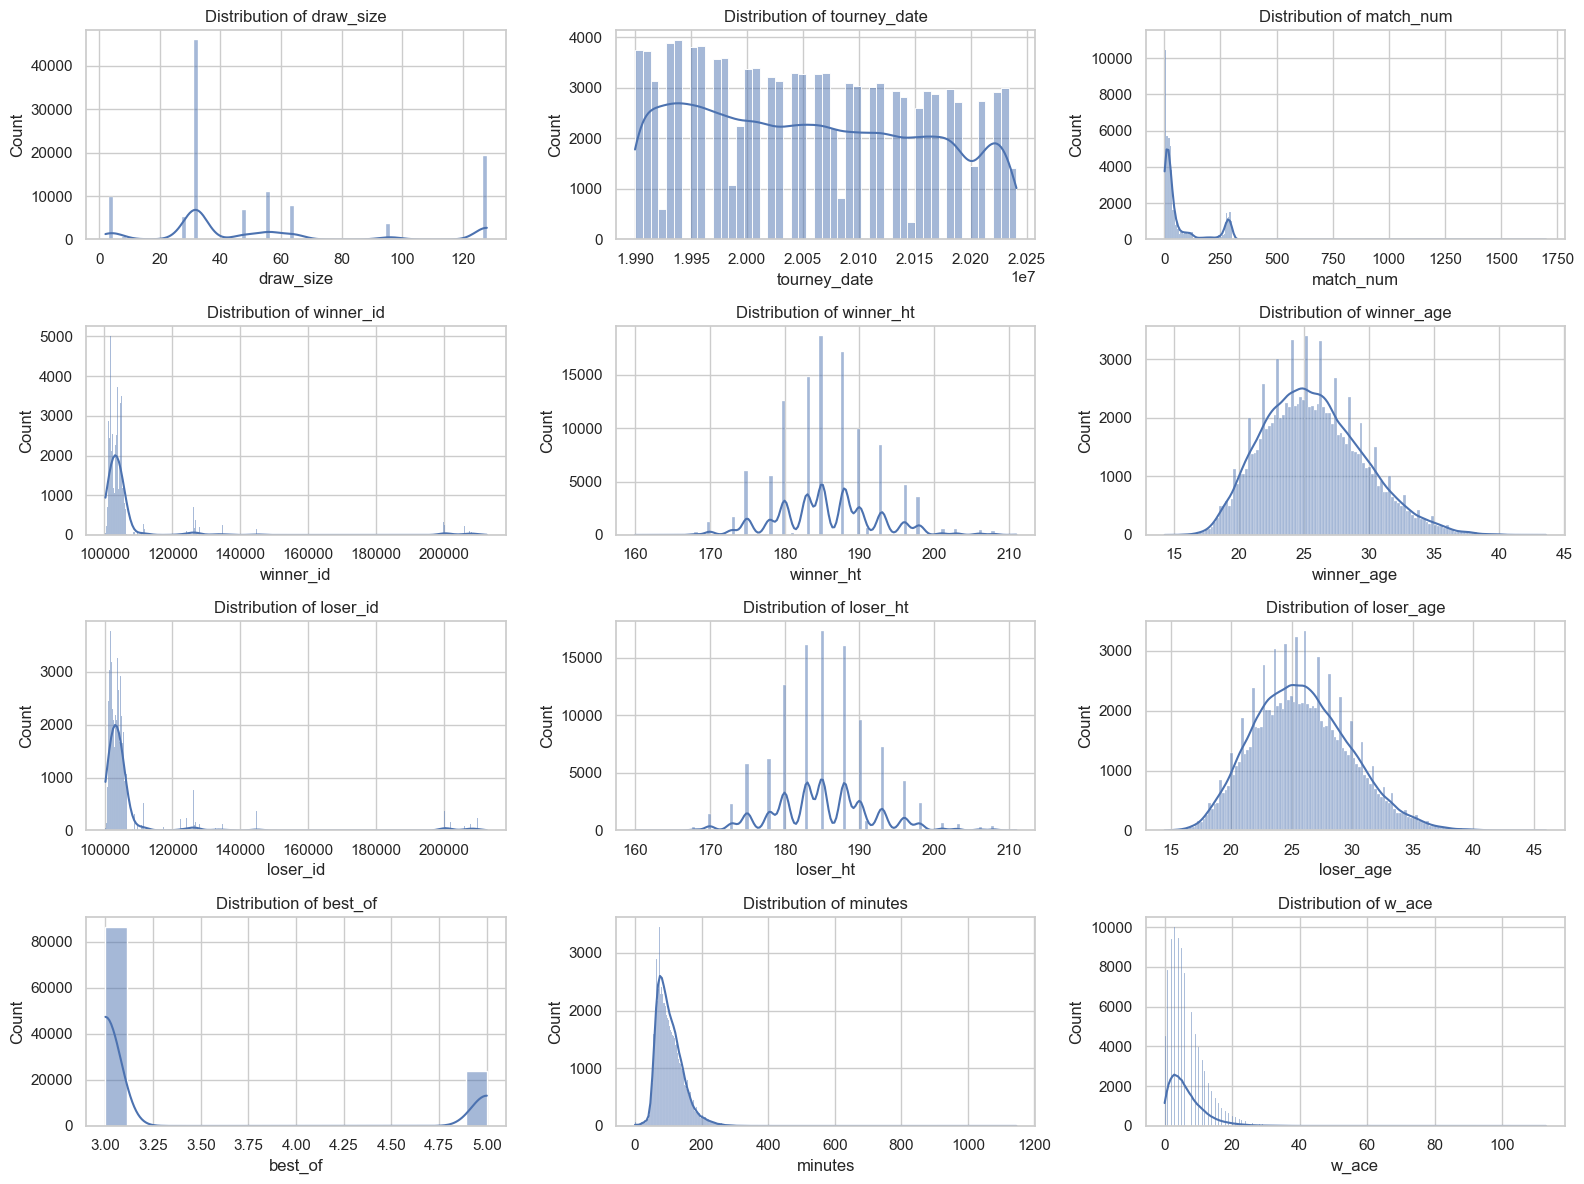

In [17]:
# Analyzing distributions of numerical variables
numeric_cols = initial_clean_df.select_dtypes(include=['int64', 'float64']).columns

# Creating histograms for key numerical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:12]):  # Limit to first 12 numerical columns
    plt.subplot(4, 3, i+1)
    sns.histplot(initial_clean_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

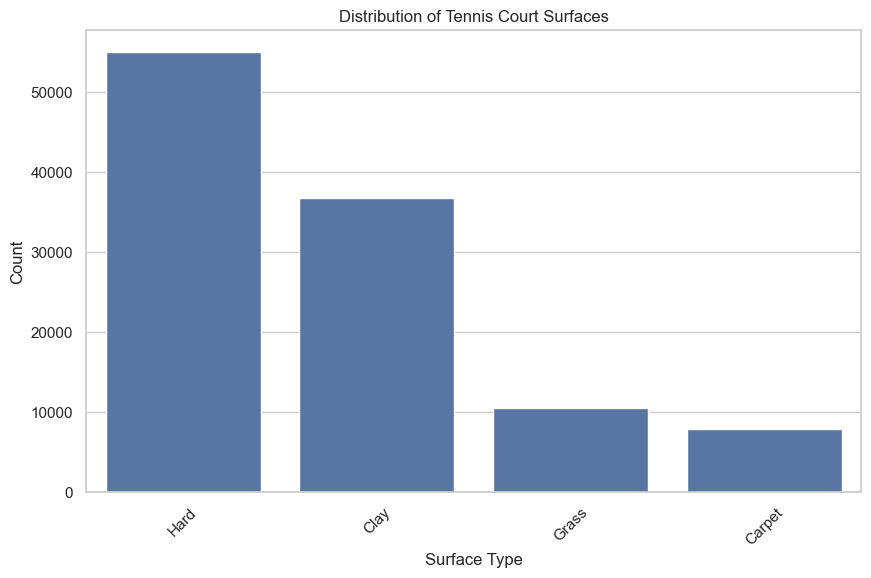

In [18]:
# Analyzing tennis surfaces distribution
if 'surface' in initial_clean_df.columns:
    plt.figure(figsize=(10, 6))
    surface_counts = initial_clean_df['surface'].value_counts()
    sns.barplot(x=surface_counts.index, y=surface_counts.values)
    plt.title('Distribution of Tennis Court Surfaces')
    plt.xlabel('Surface Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

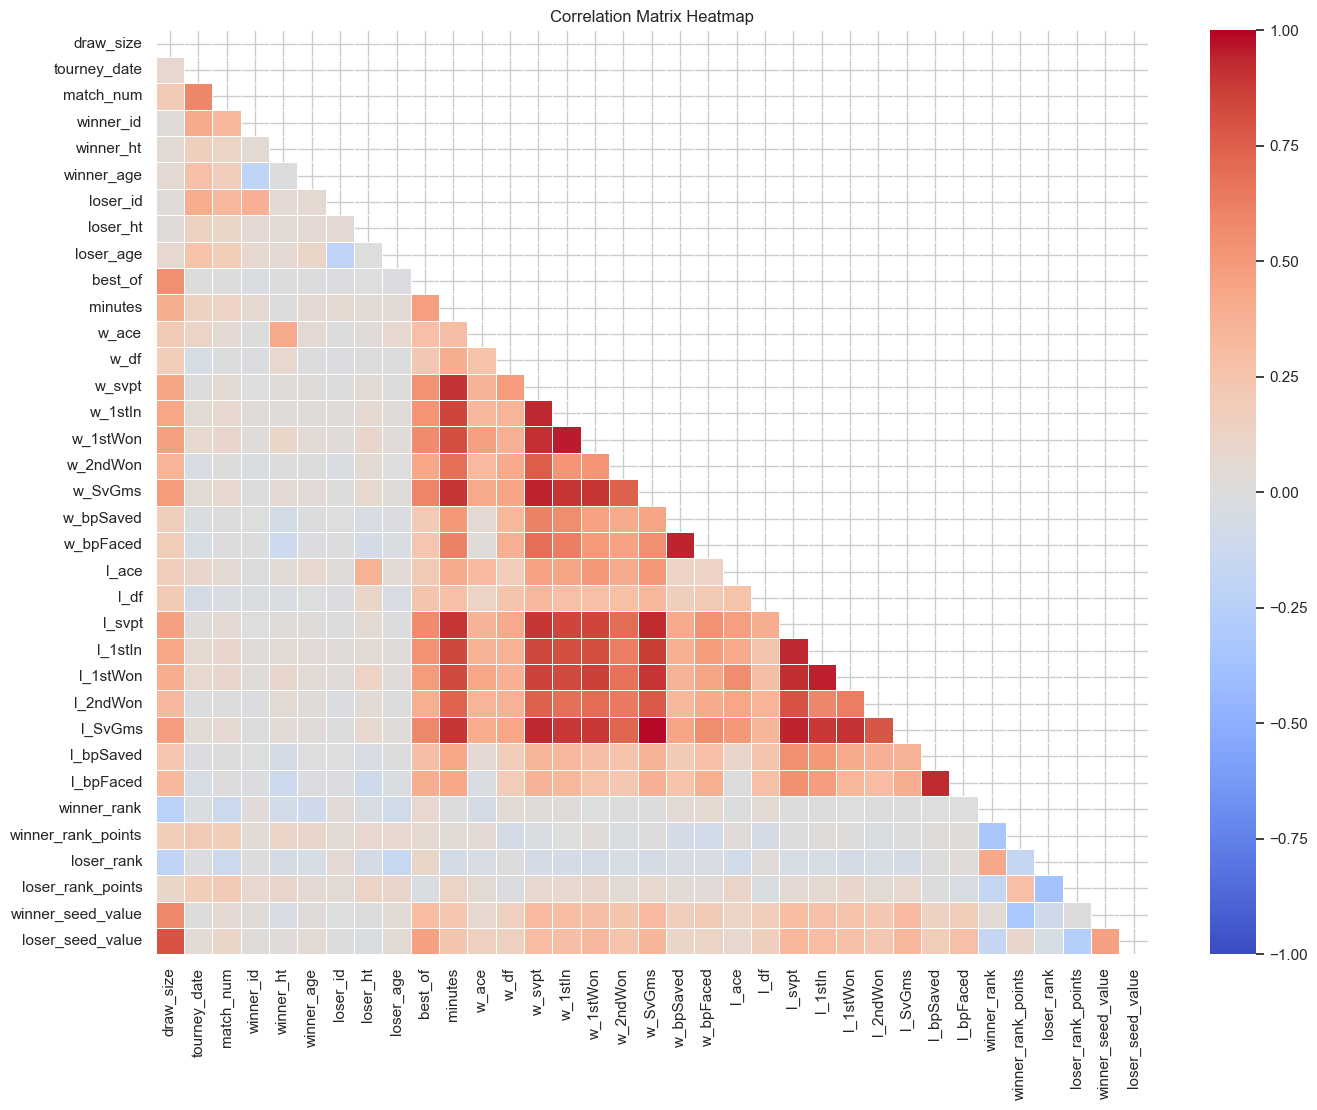

Top correlations:
w_SvGms - l_SvGms: 0.9846
w_1stIn - w_1stWon: 0.9605
l_1stIn - l_1stWon: 0.9531
w_svpt - w_SvGms: 0.9422
l_svpt - l_SvGms: 0.9401
w_bpSaved - w_bpFaced: 0.9399
w_svpt - w_1stIn: 0.9371
l_svpt - l_1stIn: 0.9334
w_svpt - l_SvGms: 0.9319
w_SvGms - l_svpt: 0.9258
l_bpSaved - l_bpFaced: 0.9222
l_svpt - l_1stWon: 0.9214
w_svpt - w_1stWon: 0.9095
l_1stWon - l_SvGms: 0.9048
minutes - w_svpt: 0.8990
w_1stWon - w_SvGms: 0.8984
w_SvGms - l_1stWon: 0.8968
w_svpt - l_svpt: 0.8940
minutes - l_SvGms: 0.8939
w_1stIn - w_SvGms: 0.8934


In [19]:
# Correlation analysis
# Select only numerical columns for correlation
numeric_df = initial_clean_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Display top correlations
def get_top_correlations(corr_matrix, n=20):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                              corr_matrix.iloc[i, j]))
    
    return sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:n]

top_corrs = get_top_correlations(corr_matrix)
print("Top correlations:")
for var1, var2, corr in top_corrs:
    print(f"{var1} - {var2}: {corr:.4f}")

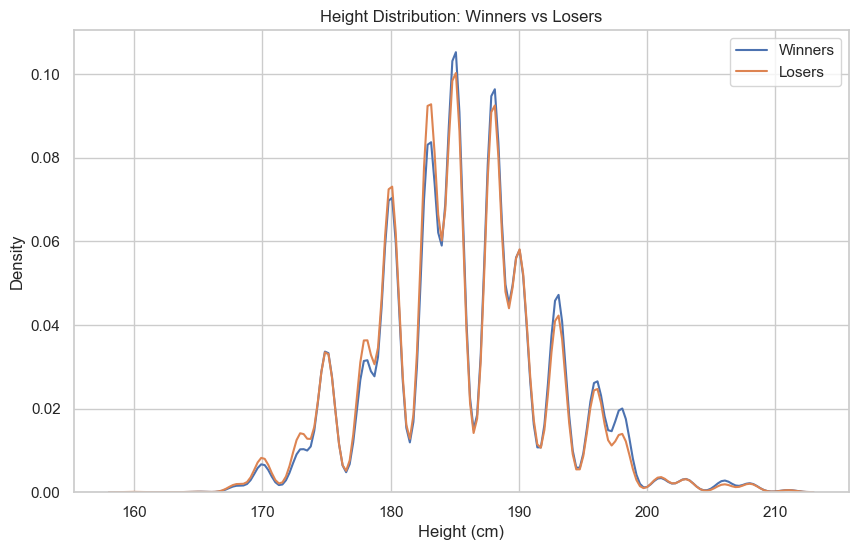

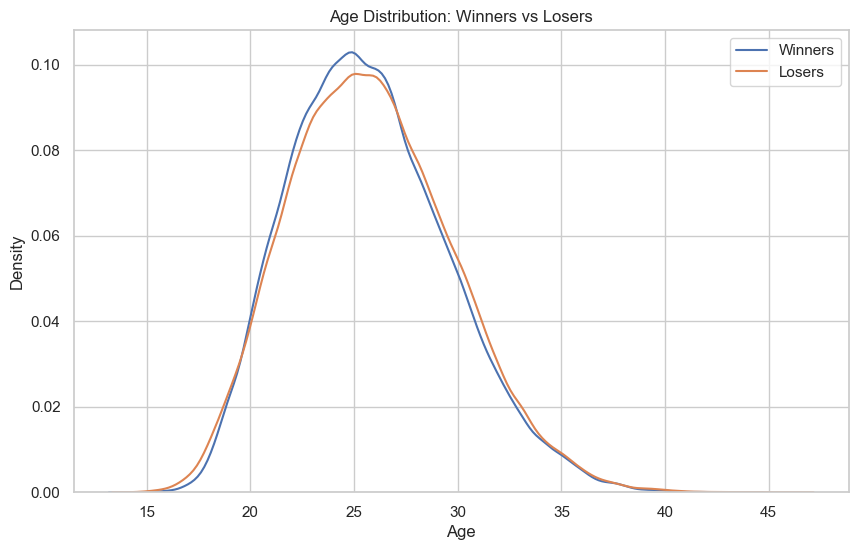

In [20]:
# Analysis of winners vs losers statistics
# Check for columns that may contain winner and loser statistics
winner_cols = [col for col in initial_clean_df.columns if col.startswith('winner_')]
loser_cols = [col for col in initial_clean_df.columns if col.startswith('loser_')]

# Compare heights of winners and losers
if 'winner_ht' in initial_clean_df.columns and 'loser_ht' in initial_clean_df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(initial_clean_df['winner_ht'].dropna(), label='Winners')
    sns.kdeplot(initial_clean_df['loser_ht'].dropna(), label='Losers')
    plt.title('Height Distribution: Winners vs Losers')
    plt.xlabel('Height (cm)')
    plt.legend()
    plt.show()

# Compare ages of winners and losers
if 'winner_age' in initial_clean_df.columns and 'loser_age' in initial_clean_df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(initial_clean_df['winner_age'].dropna(), label='Winners')
    sns.kdeplot(initial_clean_df['loser_age'].dropna(), label='Losers')
    plt.title('Age Distribution: Winners vs Losers')
    plt.xlabel('Age')
    plt.legend()
    plt.show()

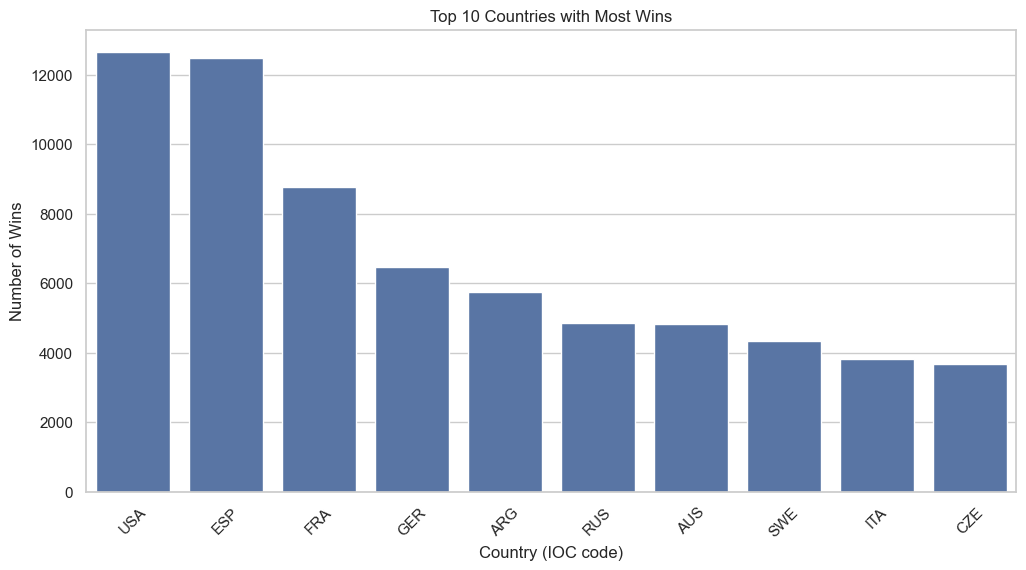

In [21]:
# Analysis by country (IOC code)
if 'winner_ioc' in initial_clean_df.columns:
    top_countries = initial_clean_df['winner_ioc'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_countries.index, y=top_countries.values)
    plt.title('Top 10 Countries with Most Wins')
    plt.xlabel('Country (IOC code)')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45)
    plt.show()

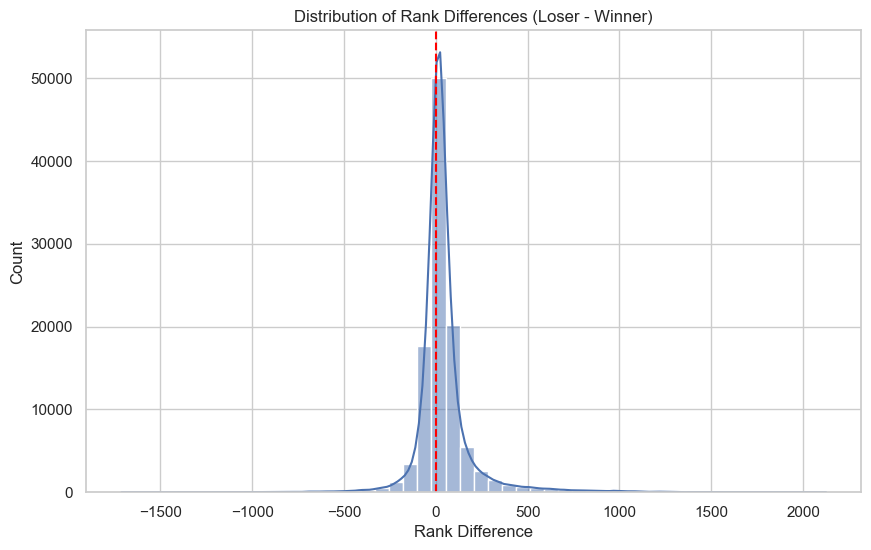

Higher ranked player win rate: 0.6520
Lower ranked player win rate: 0.3480


In [22]:
# Win probability analysis based on rankings (if available)
if 'winner_rank' in initial_clean_df.columns and 'loser_rank' in initial_clean_df.columns:
    initial_clean_df['rank_diff'] = initial_clean_df['loser_rank'] - initial_clean_df['winner_rank']
    
    plt.figure(figsize=(10, 6))
    sns.histplot(initial_clean_df['rank_diff'].dropna(), bins=50, kde=True)
    plt.title('Distribution of Rank Differences (Loser - Winner)')
    plt.xlabel('Rank Difference')
    plt.axvline(x=0, color='red', linestyle='--')
    plt.show()
    
    # Calculate win rate when higher ranked (negative rank_diff means winner had worse rank)
    higher_ranked_wins = (initial_clean_df['rank_diff'] > 0).sum()
    lower_ranked_wins = (initial_clean_df['rank_diff'] < 0).sum()
    
    print(f"Higher ranked player win rate: {higher_ranked_wins/(higher_ranked_wins+lower_ranked_wins):.4f}")
    print(f"Lower ranked player win rate: {lower_ranked_wins/(higher_ranked_wins+lower_ranked_wins):.4f}")

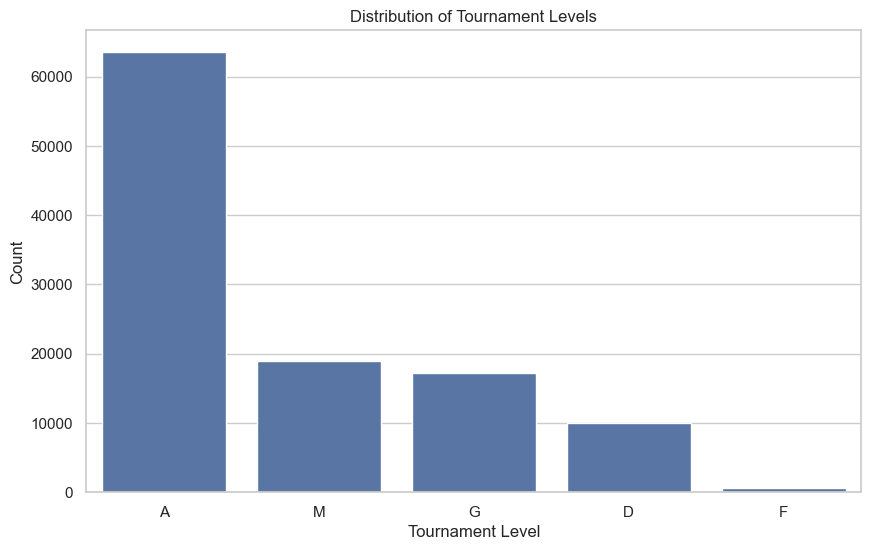

Tournament Levels:
G = Grand Slam
M = Masters 1000
A = ATP Tour 500 and 250 level events
C = Challenger events
S = Satellite events
F = ITF Futures events


In [23]:
# Analysis by tournament level
if 'tourney_level' in initial_clean_df.columns:
    plt.figure(figsize=(10, 6))
    level_counts = initial_clean_df['tourney_level'].value_counts()
    sns.barplot(x=level_counts.index, y=level_counts.values)
    plt.title('Distribution of Tournament Levels')
    plt.xlabel('Tournament Level')
    plt.ylabel('Count')
    plt.show()
    
    # Explanation of tournament levels
    print("Tournament Levels:")
    print("G = Grand Slam")
    print("M = Masters 1000")
    print("A = ATP Tour 500 and 250 level events")
    print("C = Challenger events")
    print("S = Satellite events")
    print("F = ITF Futures events")

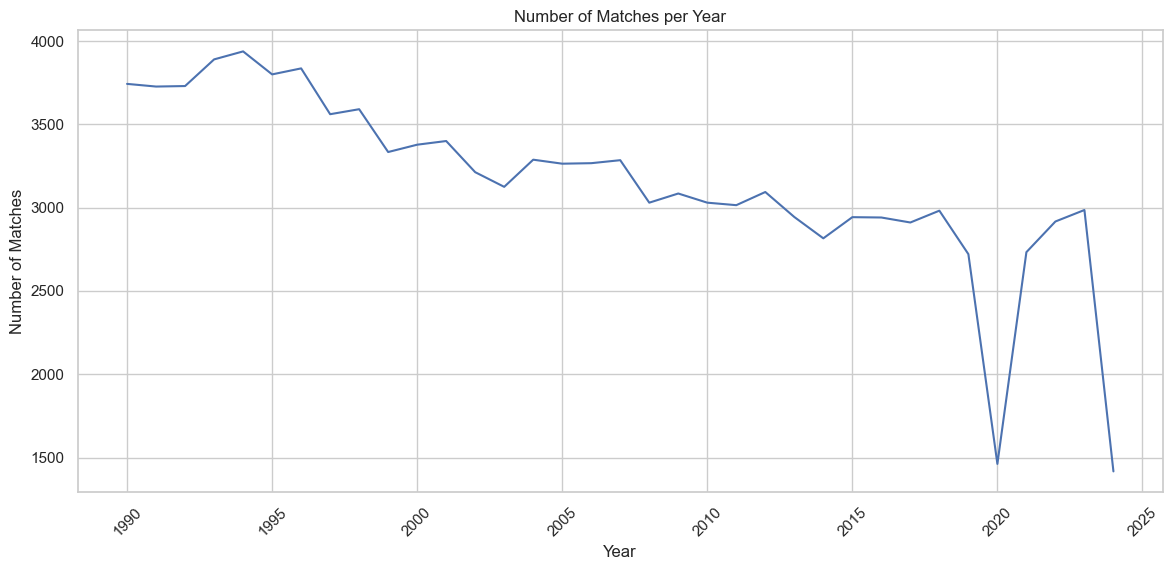

In [24]:
# Time series analysis (if date information is available)
if 'tourney_date' in initial_clean_df.columns:
    # Convert date format (YYYYMMDD) to datetime
    initial_clean_df['date'] = pd.to_datetime(initial_clean_df['tourney_date'], format='%Y%m%d')
    
    # Extract year
    initial_clean_df['year'] = initial_clean_df['date'].dt.year
    
    # Plot matches per year
    plt.figure(figsize=(14, 6))
    year_counts = initial_clean_df['year'].value_counts().sort_index()
    sns.lineplot(x=year_counts.index, y=year_counts.values)
    plt.title('Number of Matches per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Matches')
    plt.xticks(rotation=45)
    plt.show()

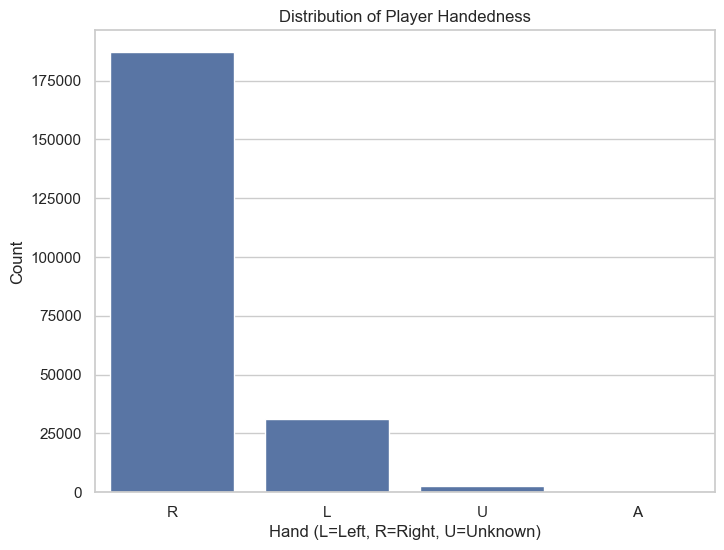

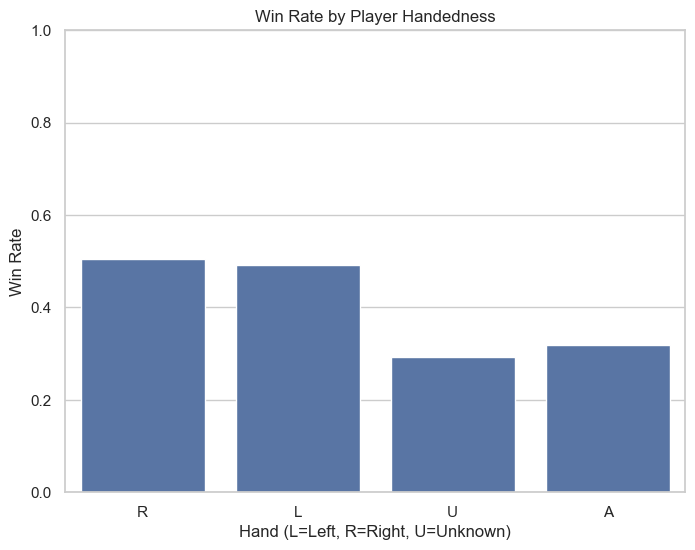

In [25]:
# Analysis of player handedness
if 'winner_hand' in initial_clean_df.columns and 'loser_hand' in initial_clean_df.columns:
    # Combined hand distribution
    all_hands = pd.concat([
        initial_clean_df['winner_hand'].rename('hand'),
        initial_clean_df['loser_hand'].rename('hand')
    ])
    
    plt.figure(figsize=(8, 6))
    hand_counts = all_hands.value_counts()
    sns.barplot(x=hand_counts.index, y=hand_counts.values)
    plt.title('Distribution of Player Handedness')
    plt.xlabel('Hand (L=Left, R=Right, U=Unknown)')
    plt.ylabel('Count')
    plt.show()
    
    # Win rate by handedness
    hand_wins = initial_clean_df['winner_hand'].value_counts()
    hand_losses = initial_clean_df['loser_hand'].value_counts()
    
    # Create dataframe for win percentage
    hand_stats = pd.DataFrame({
        'wins': hand_wins,
        'losses': hand_losses
    }).fillna(0)
    
    hand_stats['total'] = hand_stats['wins'] + hand_stats['losses']
    hand_stats['win_rate'] = hand_stats['wins'] / hand_stats['total']
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=hand_stats.index, y=hand_stats['win_rate'])
    plt.title('Win Rate by Player Handedness')
    plt.xlabel('Hand (L=Left, R=Right, U=Unknown)')
    plt.ylabel('Win Rate')
    plt.ylim(0, 1)
    plt.show()

<Figure size 1200x1000 with 0 Axes>

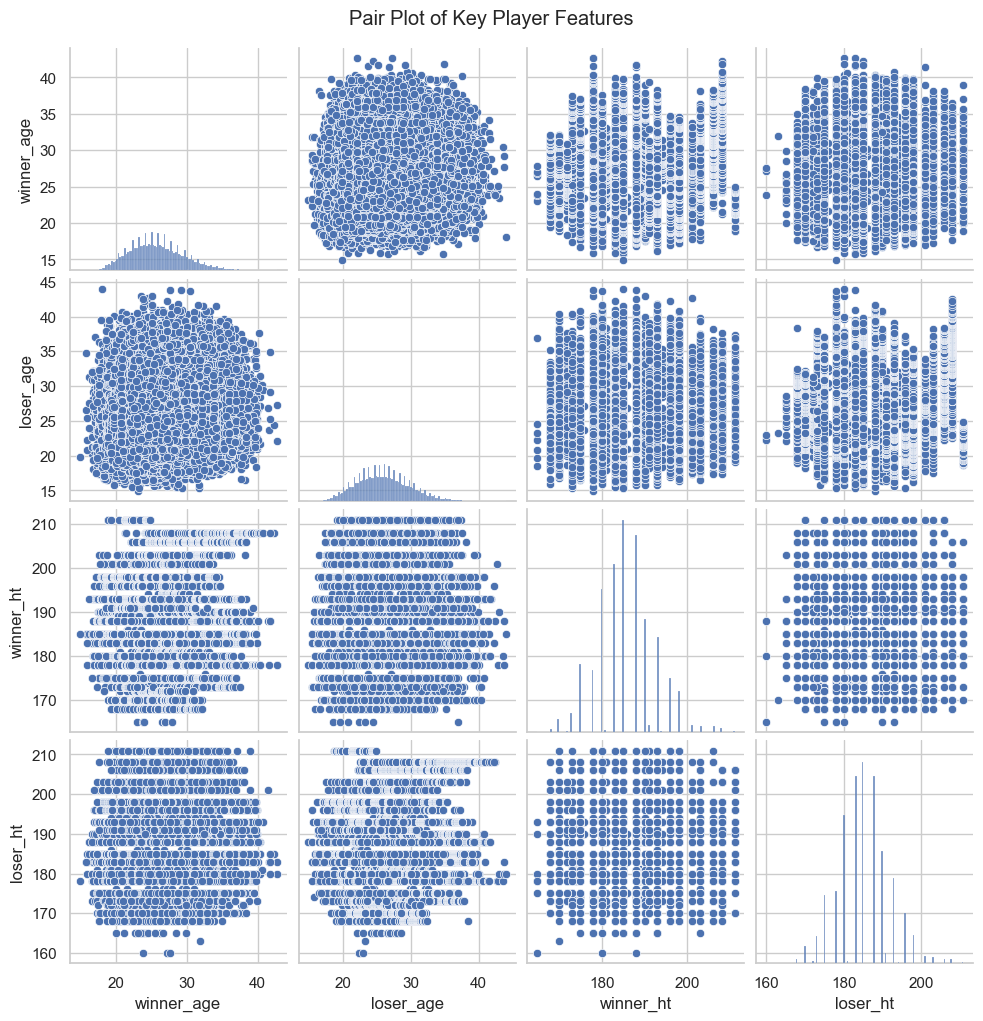

In [26]:
# Pair plot of selected key numerical features
selected_features = ['winner_age', 'loser_age', 'winner_ht', 'loser_ht']
features_present = [col for col in selected_features if col in initial_clean_df.columns]

if len(features_present) > 1:
    plt.figure(figsize=(12, 10))
    sns.pairplot(initial_clean_df[features_present].dropna())
    plt.suptitle('Pair Plot of Key Player Features', y=1.02)
    plt.show()

In [27]:
# Summary of findings
print("Summary of Data Exploration:")
print("--------------------------")
print(f"1. Dataset contains {initial_clean_df.shape[0]} rows and {initial_clean_df.shape[1]} columns")

missing_cols = missing_data[missing_data['Missing Values'] > 0]
print(f"2. There are {len(missing_cols)} columns with missing values")

if 'surface' in initial_clean_df.columns:
    surfaces = initial_clean_df['surface'].value_counts()
    dominant_surface = surfaces.index[0]
    print(f"3. Most common playing surface: {dominant_surface} ({surfaces.iloc[0]} matches)")

if 'winner_hand' in initial_clean_df.columns:
    right_handed = (initial_clean_df['winner_hand'] == 'R').sum() + (initial_clean_df['loser_hand'] == 'R').sum()
    left_handed = (initial_clean_df['winner_hand'] == 'L').sum() + (initial_clean_df['loser_hand'] == 'L').sum()
    total_hands = right_handed + left_handed
    print(f"4. Handedness distribution: Right-handed: {right_handed/total_hands:.1%}, Left-handed: {left_handed/total_hands:.1%}")

# Additional insights would be added based on actual data exploration results

Summary of Data Exploration:
--------------------------
1. Dataset contains 110397 rows and 66 columns
2. There are 30 columns with missing values
3. Most common playing surface: Hard (55065 matches)
4. Handedness distribution: Right-handed: 85.7%, Left-handed: 14.3%
